**Цель**:

Ваша задача - построить модель классификации, которая сможет определить тип вина на основе его химических характеристик, используя алгоритм логистической регрессии. В процессе выполнения домашнего задания вы также научитесь визуализировать данные для анализа их распределения.



**Данные**:

Вам предоставлен набор данных о винах, который содержит различные химические характеристики вин, такие как содержание алкоголя, магния и других веществ, а также класс вина. Данные load_wine можно загрузить из библиотеки sklearn.datasets.



In [8]:
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)
data = pd.concat([X, y.rename('target')], axis=1)


**Задания**:

**1. Анализ структуры данных**:

Выведите на экран первые 5 строк полученного DataFrame с помощью метода .head().

Выведите на экран список всех столбцов полученного DataFrame.

Используя методы info() и describe(), проведите базовый анализ структуры и основных статистических характеристик данных.

In [10]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [13]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


**2. Визуализация данных**:

Используйте seaborn для создания scatterplot, показывающего зависимость между содержанием алкоголя и уровнем магния в вине, с разделением по типу вина.

Создайте boxplot, отображающий распределение уровня алкоголя по сортам вина.



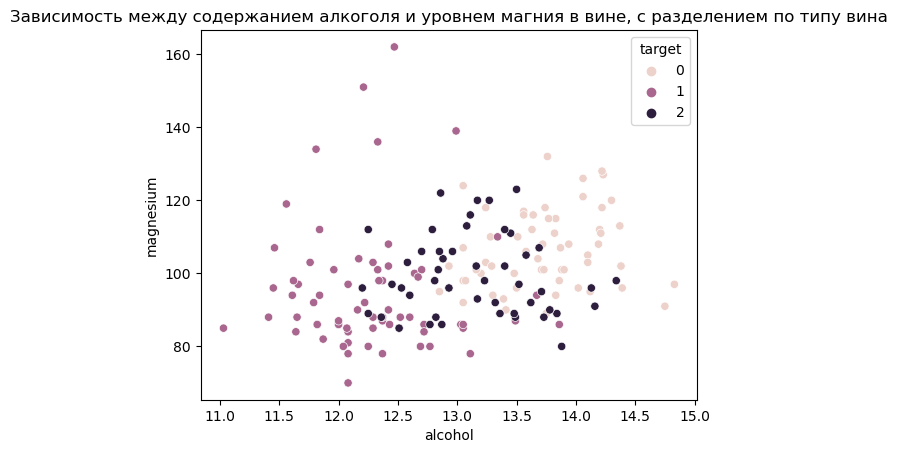

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='alcohol',y='magnesium',data=data,hue='target')
plt.title('Зависимость между содержанием алкоголя и уровнем магния в вине, с разделением по типу вина')
plt.show()

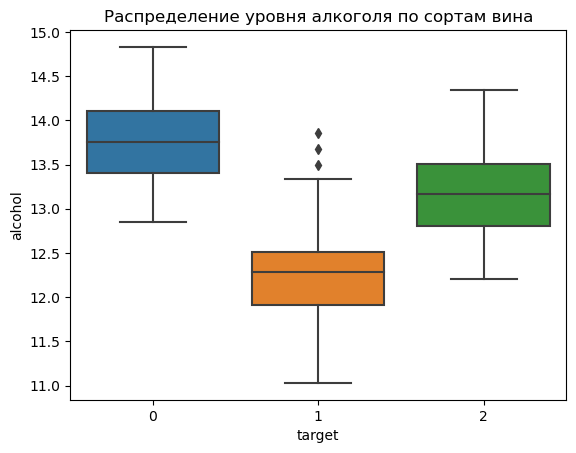

In [18]:
sns.boxplot(data=data,x='target',y='alcohol')
plt.title('Распределение уровня алкоголя по сортам вина')
plt.show()

**3.Создание и обучение модели логистической регрессии**:

Создайте экземпляр модели LogisticRegression с параметрами max_iter=10000 и random_state=42. Обучите модель на обучающей выборке.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

model = LogisticRegression(max_iter = 10000)
model.fit(X_train,y_train)

predictions = model.predict(X_test)
predictions

array([0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1,
       0, 0, 2, 2, 1, 1, 0, 2, 2, 2])

**4. Оценка производительности модели**:

Сделайте предсказание на тестовых данных и вычислите точность модели с помощью accuracy_score. Проанализируйте результаты.

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy:{accuracy}")

Accuracy:0.9814814814814815
